# COGS 108 - Final Project 

# Overview

This experiment aims to determine whether the year 2020 affected rates of reported crime. The main question is whether or not the expected increase in crime during summer season was significantly different. In conclusion, 2020 seemed to have a significantly large increase in summer reported crimes when compared to 2019.

# Name & GitHub

- Name: Cedric Wong
- GitHub Username: Melchsee

# Research Question

*Did the year 2020 affect reported crime rates?"

## Background and Prior Work

It's a well documented fact that crime rates tend to increase during the summer [1]. This can be attributed to various factors; Higher temperatures can cause increased emotional outbursts, students tend to have more free time on their hands for other (potentially illegal) activities, alcohol consumption goes up around the same time, and many other reasons. However, the spread of Covid-19 in 2020 greatly limited the outdoor and social activities of most people, causing a unique situation.

NPR reports that violent crime rates increased or remained stable this year, but crime as a whole has dropped dramatically compared to 2019 [2]. This project aims to determine what effect the pandemic has had on the expected increase in crime that is typically seen during the summer months. This question is limited to the San Diego area (as this is the data that was provided).

References (include links):
- 1)https://www.getsafe.com/summer-crime-rates/
- 2)https://www.npr.org/2020/07/20/892418244/crime-has-declined-overall-during-the-pandemic-but-shootings-and-killings-are-up

# Hypothesis


I hypothesize that the increase in crime rate in the summer of 2020 will be larger than in previous years. Life under quarantine had become more normalized by that point, and I expect crime rates to return to normal levels; that is to say, they would be elevated back to expected rates around the time summer begins.

# Dataset(s)

(Copy this information for each dataset)
- Dataset Name: PD Calls for Service 2019 and PD Calls for Service 2020
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 1,113,536

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
#importing data
df_19 = pd.read_csv("pd_calls_for_service_2019_datasd.csv")
df_20 = pd.read_csv("pd_calls_for_service_2020_datasd.csv")

# Data Cleaning

Describe your data cleaning steps here.

In [89]:
#looking at data
display(df_19.head(), df_20.head())

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E19010000001,2019-01-01 00:00:01,1,3800,NaN,NATIONAL,AVE,NaN,NaN,NaN,AU1,DUP,441,1
1,E19010000002,2019-01-01 00:00:04,1,6500,NaN,REFLECTION,DR,NaN,NaN,NaN,415,K,321,2
2,E19010000003,2019-01-01 00:00:09,1,0,NaN,06TH,AVE,NaN,ISLAND,NaN,FD,K,523,2
3,E19010000004,2019-01-01 00:00:19,1,0,NaN,VESTA,ST,NaN,MAIN,NaN,AU1,W,511,1
4,E19010000005,2019-01-01 00:00:31,1,0,NaN,04TH,AVE,NaN,ISLAND,NaN,586,CAN,523,4


,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E20010000001,2020-01-01 00:00:09,4,400,NaN,06TH,AVE,NaN,NaN,NaN,11-8,A,523,0
1,E20010000002,2020-01-01 00:00:20,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
2,E20010000003,2020-01-01 00:00:21,4,800,NaN,SAWTELLE,AVE,NaN,NaN,NaN,AU1,W,434,1
3,E20010000004,2020-01-01 00:00:32,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
4,E20010000005,2020-01-01 00:00:42,4,5200,NaN,CLAIREMONT MESA,BLV,NaN,NaN,NaN,415V,K,111,1


In [90]:
#verifying that columns are identical (can combine vertically without having to drop columns)
display(df_19.columns, df_20.columns)

Index(['incident_num', 'date_time', 'day_of_week', 'address_number_primary',
       'address_dir_primary', 'address_road_primary', 'address_sfx_primary',
       'address_dir_intersecting', 'address_road_intersecting',
       'address_sfx_intersecting', 'call_type', 'disposition', 'beat',
       'priority'],
      dtype='object')

Index(['incident_num', 'date_time', 'day_of_week', 'address_number_primary',
       'address_dir_primary', 'address_road_primary', 'address_sfx_primary',
       'address_dir_intersecting', 'address_road_intersecting',
       'address_sfx_intersecting', 'call_type', 'disposition', 'beat',
       'priority'],
      dtype='object')

In [91]:
#checking for null values
dt_19 = df_19['date_time'].isnull().value_counts()
dt_20 = df_20['date_time'].isnull().value_counts()
ct_19 = df_19['call_type'].isnull().value_counts()
ct_20 = df_20['call_type'].isnull().value_counts()
display(dt_19, dt_20, ct_19, ct_20)

False    590967
Name: date_time, dtype: int64

False    522569
Name: date_time, dtype: int64

False    588941
True       2026
Name: call_type, dtype: int64

False    522127
True        442
Name: call_type, dtype: int64

In [92]:
#dropping rows with null values in the columns we'll be using
df_19.drop(df_19[df_19['call_type'].isnull()].index, inplace = True)
df_20.drop(df_20[df_20['call_type'].isnull()].index, inplace = True)
display(df_19.shape, df_20.shape)

(588941, 14)

(522127, 14)

In [93]:
#Adding year column
df_19['year'] = 2019
df_20['year'] = 2020

In [94]:
#combining dataframes
df = pd.concat([df_19, df_20], keys = ["2019", "2020"])
df

incident_num            date_time  day_of_week  \
2019 0       E19010000001  2019-01-01 00:00:01            1   
     1       E19010000002  2019-01-01 00:00:04            1   
     2       E19010000003  2019-01-01 00:00:09            1   
     3       E19010000004  2019-01-01 00:00:19            1   
     4       E19010000005  2019-01-01 00:00:31            1   
...                   ...                  ...          ...   
2020 522564  E20120001602  2020-12-01 23:23:01            3   
     522565  E20120001605  2020-12-01 23:28:18            3   
     522566  E20120001608  2020-12-01 23:33:18            3   
     522567  E20120001616  2020-12-01 23:48:27            3   
     522568  E20120001618  2020-12-01 23:51:07            3   

             address_number_primary address_dir_primary address_road_primary  \
2019 0                         3800                 NaN             NATIONAL   
     1                         6500                 NaN           REFLECTION   
     2                            0                 NaN                 06TH   
     3                            0                 NaN                VESTA   
     4                            0                 NaN                 04TH   
...                             ...                 ...                  ...   
2020 522564                    1200                 NaN                    K   
     522565                    5800                 NaN           STREAMVIEW   
     522566                     100                   E        CALLE PRIMERA   
     522567                     100                 NaN                 06TH   
     522568                       0                 NaN                 I-15   

            address_sfx_primary  address_dir_intersecting  \
2019 0                      AVE                       NaN   
     1                       DR                       NaN   
     2                      AVE                       NaN   
     3                       ST                       NaN   
     4                      AVE                       NaN   
...                         ...                       ...   
2020 522564                  ST                       NaN   
     522565                  DR                       NaN   
     522566                 NaN                       NaN   
     522567                 AVE                       NaN   
     522568                 NaN                       NaN   

            address_road_intersecting  address_sfx_intersecting call_type  \
2019 0                            NaN                       NaN       AU1   
     1                            NaN                       NaN       415   
     2                         ISLAND                       NaN        FD   
     3                           MAIN                       NaN       AU1   
     4                         ISLAND                       NaN       586   
...                               ...                       ...       ...   
2020 522564                       NaN                       NaN    MPSSTP   
     522565                       NaN                       NaN       417   
     522566                       NaN                       NaN         T   
     522567                       NaN                       NaN    SELENF   
     522568                  EL CAJON                       NaN         T   

            disposition  beat  priority  year  
2019 0              DUP   441         1  2019  
     1                K   321         2  2019  
     2                K   523         2  2019  
     3                W   511         1  2019  
     4              CAN   523         4  2019  
...                 ...   ...       ...   ...  
2020 522564           K   521         2  2020  
     522565           K   823         0  2020  
     522566           K   712         2  2020  
     522567           K   521         3  2020  
     522568           K   825         2  2020  

[1111068 rows x 15 columns]

In [95]:
#adding month column to determine season, treating june/july/august as summer
df['month'] = pd.to_numeric(df.date_time.str[5:7])
df

incident_num            date_time  day_of_week  \
2019 0       E19010000001  2019-01-01 00:00:01            1   
     1       E19010000002  2019-01-01 00:00:04            1   
     2       E19010000003  2019-01-01 00:00:09            1   
     3       E19010000004  2019-01-01 00:00:19            1   
     4       E19010000005  2019-01-01 00:00:31            1   
...                   ...                  ...          ...   
2020 522564  E20120001602  2020-12-01 23:23:01            3   
     522565  E20120001605  2020-12-01 23:28:18            3   
     522566  E20120001608  2020-12-01 23:33:18            3   
     522567  E20120001616  2020-12-01 23:48:27            3   
     522568  E20120001618  2020-12-01 23:51:07            3   

             address_number_primary address_dir_primary address_road_primary  \
2019 0                         3800                 NaN             NATIONAL   
     1                         6500                 NaN           REFLECTION   
     2                            0                 NaN                 06TH   
     3                            0                 NaN                VESTA   
     4                            0                 NaN                 04TH   
...                             ...                 ...                  ...   
2020 522564                    1200                 NaN                    K   
     522565                    5800                 NaN           STREAMVIEW   
     522566                     100                   E        CALLE PRIMERA   
     522567                     100                 NaN                 06TH   
     522568                       0                 NaN                 I-15   

            address_sfx_primary  address_dir_intersecting  \
2019 0                      AVE                       NaN   
     1                       DR                       NaN   
     2                      AVE                       NaN   
     3                       ST                       NaN   
     4                      AVE                       NaN   
...                         ...                       ...   
2020 522564                  ST                       NaN   
     522565                  DR                       NaN   
     522566                 NaN                       NaN   
     522567                 AVE                       NaN   
     522568                 NaN                       NaN   

            address_road_intersecting  address_sfx_intersecting call_type  \
2019 0                            NaN                       NaN       AU1   
     1                            NaN                       NaN       415   
     2                         ISLAND                       NaN        FD   
     3                           MAIN                       NaN       AU1   
     4                         ISLAND                       NaN       586   
...                               ...                       ...       ...   
2020 522564                       NaN                       NaN    MPSSTP   
     522565                       NaN                       NaN       417   
     522566                       NaN                       NaN         T   
     522567                       NaN                       NaN    SELENF   
     522568                  EL CAJON                       NaN         T   

            disposition  beat  priority  year  month  
2019 0              DUP   441         1  2019      1  
     1                K   321         2  2019      1  
     2                K   523         2  2019      1  
     3                W   511         1  2019      1  
     4              CAN   523         4  2019      1  
...                 ...   ...       ...   ...    ...  
2020 522564           K   521         2  2020     12  
     522565           K   823         0  2020     12  
     522566           K   712         2  2020     12  
     522567           K   521         3  2020     12  
     522568           K   825   

In [96]:
#one-hot encoding summer column
df['summer'] = ((df.month <= 8) & (df.month >= 6))
df

incident_num            date_time  day_of_week  \
2019 0       E19010000001  2019-01-01 00:00:01            1   
     1       E19010000002  2019-01-01 00:00:04            1   
     2       E19010000003  2019-01-01 00:00:09            1   
     3       E19010000004  2019-01-01 00:00:19            1   
     4       E19010000005  2019-01-01 00:00:31            1   
...                   ...                  ...          ...   
2020 522564  E20120001602  2020-12-01 23:23:01            3   
     522565  E20120001605  2020-12-01 23:28:18            3   
     522566  E20120001608  2020-12-01 23:33:18            3   
     522567  E20120001616  2020-12-01 23:48:27            3   
     522568  E20120001618  2020-12-01 23:51:07            3   

             address_number_primary address_dir_primary address_road_primary  \
2019 0                         3800                 NaN             NATIONAL   
     1                         6500                 NaN           REFLECTION   
     2                            0                 NaN                 06TH   
     3                            0                 NaN                VESTA   
     4                            0                 NaN                 04TH   
...                             ...                 ...                  ...   
2020 522564                    1200                 NaN                    K   
     522565                    5800                 NaN           STREAMVIEW   
     522566                     100                   E        CALLE PRIMERA   
     522567                     100                 NaN                 06TH   
     522568                       0                 NaN                 I-15   

            address_sfx_primary  address_dir_intersecting  \
2019 0                      AVE                       NaN   
     1                       DR                       NaN   
     2                      AVE                       NaN   
     3                       ST                       NaN   
     4                      AVE                       NaN   
...                         ...                       ...   
2020 522564                  ST                       NaN   
     522565                  DR                       NaN   
     522566                 NaN                       NaN   
     522567                 AVE                       NaN   
     522568                 NaN                       NaN   

            address_road_intersecting  address_sfx_intersecting call_type  \
2019 0                            NaN                       NaN       AU1   
     1                            NaN                       NaN       415   
     2                         ISLAND                       NaN        FD   
     3                           MAIN                       NaN       AU1   
     4                         ISLAND                       NaN       586   
...                               ...                       ...       ...   
2020 522564                       NaN                       NaN    MPSSTP   
     522565                       NaN                       NaN       417   
     522566                       NaN                       NaN         T   
     522567                       NaN                       NaN    SELENF   
     522568                  EL CAJON                       NaN         T   

            disposition  beat  priority  year  month  summer  
2019 0              DUP   441         1  2019      1   False  
     1                K   321         2  2019      1   False  
     2                K   523         2  2019      1   False  
     3                W   511         1  2019      1   False  
     4              CAN   523         4  2019      1   False  
...                 ...   ...       ...   ...    ...     ...  
2020 522564           K   521         2  2020     12   False  
     522565           K   823         0  2020     12   False  
     522566           K   712         2  2020     12   False  
     52

In [97]:
#Since we're still in the middle of december, reported crimes for december 2020 are lower than normal
crimes_count_19 = df.loc['2019']['month'].value_counts().sort_index()
crimes_count_20 = df.loc['2020']['month'].value_counts().sort_index()
display(crimes_count_19, crimes_count_20)

1     46162
2     42096
3     49995
4     48311
5     49714
6     48618
7     53756
8     53037
9     51203
10    51530
11    47641
12    46878
Name: month, dtype: int64

1     50277
2     48404
3     48634
4     47951
5     48651
6     38256
7     48577
8     47836
9     47449
10    50108
11    44572
12     1412
Name: month, dtype: int64

In [98]:
#Since data for december is MD (Missing by Design), we can do mean imputation by taking the mean crimes for the rest of 2020
crimes_count_20[12] = crimes_count_20[0:11].mean()
crimes_count_20

1     50277
2     48404
3     48634
4     47951
5     48651
6     38256
7     48577
8     47836
9     47449
10    50108
11    44572
12    47337
Name: month, dtype: int64

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [99]:
#First, we need to make sure that the number of crimes actually did increase in summer of 2019 and summer of 2020.
crime_inc_19 = crimes_count_19.mean() - crimes_count_19[4:7].mean()
crime_inc_20 = crimes_count_20.mean() - crimes_count_20[4:7].mean()

display(crime_inc_19, crime_inc_20)
#Seems like crime rates didn't actually increase in 2019, but did in 2020.

mean_crime_diff = crime_inc_20 - crime_inc_19
mean_crime_diff

-1617.5833333333358

2176.3333333333285

3793.9166666666642

In [100]:
#Only need month and year
month_and_year = df[['month', 'year']]
month_and_year

month  year
2019 0           1  2019
     1           1  2019
     2           1  2019
     3           1  2019
     4           1  2019
...            ...   ...
2020 522564     12  2020
     522565     12  2020
     522566     12  2020
     522567     12  2020
     522568     12  2020

[1111068 rows x 2 columns]

In [101]:
#Perform permutation test to determine whether 2020 crimes and 2019 crimes are from the same distribution
#Null Hypothesis: Both years are from the same distribution
#Alternative Hypothesis: 2020 crimes are from a different distribution

n_repetitions = 500
differences = []

for _ in range(n_repetitions):
    shuffled_years = month_and_year['year'].sample(replace=False, frac=1).reset_index(drop=True)
    shuffled = pd.DataFrame({'Shuffled Year': shuffled_years})
    shuffled['Month'] = month_and_year['month'].reset_index(drop=True)
    
    shuffled_crimes_count_19 = shuffled[shuffled['Shuffled Year'] == 2019]['Month'].value_counts().sort_index()
    shuffled_crimes_count_20 = shuffled[shuffled['Shuffled Year'] == 2020]['Month'].value_counts().sort_index()
    
    shuffled_crime_inc_19 = shuffled_crimes_count_19.mean() - shuffled_crimes_count_19[4:7].mean()
    shuffled_crime_inc_20 = shuffled_crimes_count_20.mean() - shuffled_crimes_count_20[4:7].mean()
    
    shuffled_mean_crime_diff = shuffled_crime_inc_20 - shuffled_crime_inc_19
    differences.append(shuffled_mean_crime_diff)

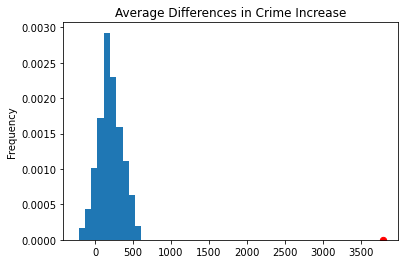

In [104]:
#plotting
title = 'Average Differences in Crime Increase'
pd.Series(differences).plot(kind='hist', density=True, title=title)
plt.scatter(mean_crime_diff, 0, color='red', s=40);

In [103]:
#We rarely if ever see such an extreme difference in crime increase
more_extreme_count = 0
for i in differences:
    if i > mean_crime_diff:
        more_extreme_count += 1

p_value = more_extreme_count / n_repetitions
p_value

0.0

# Ethics & Privacy

This data should be publically available, so I should already have permission to use it. It is possible that using crime data may expose criminal history and other sensitive personal data,; to avoid this, I only used information about the time and date of the committed crime, excluding location (aside from being limited to the San Diego area), type of crime, etc.

There are external factors that are difficult to account for that could lead to potential biases. Crime data is inherently sensitive information, and it could reflect poorly on the San Diego government if it seems like more and more activities are being considered criminal during summer season. Alternatively, seeing an increasing number of summer crimes in the San Diego area could reflect poorly on the general populace.

# Conclusion & Discussion

The permutation test analysis seems to indicate that 2020 had a particularly large increase in crimes committed during summer in the San Diego area. However, the data we were comparing to from 2019 doesn't seem to represent claims from the cited sources; in fact, the number of reported crimes decreased during summer of 2019 compared to the rest of the year. Although it is possible that the cited sources are simply incorrect, further research is needed to determine if the increase in reported crimes during summer is an ongoing trend.

Only having the data from 2 different years is problematic. There is no way to guarantee that 2019 is representative of the average year when it comes to crime in the San Diego area. This experiment should be repeated by taking a sample across several years. We also lacked data for the last month of 2020 (as we are still in 2020 ourselves at the time of this writing). Waiting until next year to redo this and avoid having to impute the missing data would be beneficial.

This experiment may lead readers to believe crime rates have been on the rise in 2020. Perhaps action (governmental or otherwise) is necessary to combat this concerning growth.